In [1]:
# 필요한 package 불러오기

%pylab inline
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import OneClassSVM

Populating the interactive namespace from numpy and matplotlib


In [2]:
!git clone https://github.com/yun-seon/LGE_DIC_Training_0404.git

Cloning into 'LGE_DIC_Training_0404'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15 (delta 3), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (15/15), 4.75 MiB | 7.80 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [3]:
# load the dataset

data= pd.read_csv("/content/LGE_DIC_Training_0404/secom.csv")
data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [4]:
# droping the first column of the data

data = data.drop(['Time'], axis = 1)
data.shape

(1567, 591)

In [5]:
# filling missing values

data.fillna(0, inplace = True)
print("NA counts: ", data.isnull().sum().sum())

data.head()

NA counts:  0


,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.0000,0.5005,0.0118,0.0035,2.3630,0.0000,0.0000,0.0000,0.0000,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.0000,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [6]:
data['Pass/Fail'].value_counts()

Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64

In [7]:
data['Pass/Fail'] = data['Pass/Fail']*(-1)

data['Pass/Fail'].value_counts()

Pass/Fail
 1    1463
-1     104
Name: count, dtype: int64

In [8]:
# again creating x and y from the dataset
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

# getting the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (1567, 590)
Shape of y: (1567,)


In [9]:
# splittng the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y, random_state = 0)

# print the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (1096, 590)
Shape of x_test : (471, 590)
Shape of y_train : (1096,)
Shape of y_test : (471,)


In [10]:
# normal data filtering for training the models

x_train_normal = x_train.loc[y_train[y_train == 1].index,:]
y_train_normal = y_train[x_train_normal.index]

print("All points: ", x_train.shape, "\nNormal points", x_train_normal.shape)
print("All points: ", y_train.shape, "\nNormal points", y_train_normal.shape)

All points:  (1096, 590) 
Normal points (1023, 590)
All points:  (1096,) 
Normal points (1023,)


In [11]:
y_train_normal.info()

<class 'pandas.core.series.Series'>
Index: 1023 entries, 1492 to 1533
Series name: Pass/Fail
Non-Null Count  Dtype
--------------  -----
1023 non-null   int64
dtypes: int64(1)
memory usage: 16.0 KB


- SVM (multi-class classification)

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.932 total time=   0.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.936 total time=   0.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.936 total time=   0.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.932 total time=   0.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.932 total time=   0.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.932 total time=   0.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.936 total time=   0.5s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.936 total time=   0.5s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.932 total time=   0.5s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.932 total time=   0.5s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.932 total time=   0.5s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [15]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=0.1, gamma=1)


In [17]:
grid_predictions = grid.predict(x_test)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        31
           1       0.93      1.00      0.97       440

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- OCSVM (one-class classiciation)

In [18]:
from sklearn.model_selection import GridSearchCV

params = {"kernel" : ["linear", "rbf"],
          "gamma" : [0.001, 0.01, 0.1],
          "nu" : [0.005, 0.05, 0.5]}

'''
OCSVM parameters (https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html)
  - kernel: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
  - degree: the degree of the polynomial kernel function
  - gamma: kernel coefficient for rbf/poly/sigmoid function
  - nu: an upper bound on the fraction of training errors and a lower bound of the fraction of support vectors
'''

# model train with gridsearchCV
grid_svm = GridSearchCV(OneClassSVM(), param_grid = params, cv = 5, scoring = ['precision', 'recall'], refit = False)
grid_svm.fit(x_train_normal, y_train_normal)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

GridSearchCV(cv=5, estimator=OneClassSVM(),
             param_grid={'gamma': [0.001, 0.01, 0.1],
                         'kernel': ['linear', 'rbf'],
                         'nu': [0.005, 0.05, 0.5]},
             refit=False, scoring=['precision', 'recall'])

In [22]:
#print(grid_svm.best_params_)

# print results
resultDf = pd.DataFrame(grid_svm.cv_results_)
pd.DataFrame(resultDf)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,param_kernel,param_nu,params,split0_test_precision,split1_test_precision,...,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,0.043687,0.013386,0.042039,0.017270,0.001,linear,0.005,"{'gamma': 0.001, 'kernel': 'linear', 'nu': 0.005}",1.0,1.0,...,0.0,1,1.000000,1.000000,0.980488,0.985294,0.990196,0.991196,0.007817,1
1,0.063859,0.038400,0.034892,0.019337,0.001,linear,0.05,"{'gamma': 0.001, 'kernel': 'linear', 'nu': 0.05}",1.0,1.0,...,0.0,1,0.946341,0.965854,0.960976,0.960784,0.901961,0.947183,0.023535,4
2,0.237691,0.044065,0.053058,0.015495,0.001,linear,0.5,"{'gamma': 0.001, 'kernel': 'linear', 'nu': 0.5}",1.0,1.0,...,0.0,1,0.487805,0.507317,0.565854,0.500000,0.441176,0.500430,0.039996,7
3,0.239263,0.017728,0.161427,0.038935,0.001,rbf,0.005,"{'gamma': 0.001, 'kernel': 'rbf', 'nu': 0.005}",0.0,0.0,...,0.0,10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10
4,0.266243,0.011874,0.158186,0.011767,0.001,rbf,0.05,"{'gamma': 0.001, 'kernel': 'rbf', 'nu': 0.05}",0.0,0.0,...,0.0,10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10
5,0.252796,0.012331,0.154364,0.007418,0.001,rbf,0.5,"{'gamma': 0.001, 'kernel': 'rbf', 'nu': 0.5}",0.0,0.0,...,0.0,10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10
6,0.018328,0.000454,0.016507,0.000995,0.01,linear,0.005,"{'gamma': 0.01, 'kernel': 'linear', 'nu': 0.005}",1.0,1.0,...,0.0,1,1.000000,1.000000,0.980488,0.985294,0.990196,0.991196,0.007817,1
7,0.043626,0.008077,0.019205,0.000953,0.01,linear,0.05,"{'gamma': 0.01, 'kernel': 'linear', 'nu': 0.05}",1.0,1.0,...,0.0,1,0.946341,0.965854,0.960976,0.960784,0.901961,0.947183,0.023535,4
8,0.180139,0.030806,0.037541,0.004753,0.01,linear,0.5,"{'gamma': 0.01, 'kernel': 'linear', 'nu': 0.5}",1.0,1.0,...,0.0,1,0.487805,0.507317,0.565854,0.500000,0.441176,0.500430,0.039996,7
9,0.215009,0.035577,0.163280,0.047554,0.01,rbf,0.005,"{'gamma': 0.01, 'kernel': 'rbf', 'nu': 0.005}",0.0,0.0,...,0.0,10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10


In [31]:
# check the best params
resultDf[['params', 'mean_test_precision', 'mean_test_recall']].sort_values('mean_test_recall', ascending = False)

,params,mean_test_precision,mean_test_recall
0,"{'gamma': 0.001, 'kernel': 'linear', 'nu': 0.005}",1.0,0.991196
12,"{'gamma': 0.1, 'kernel': 'linear', 'nu': 0.005}",1.0,0.991196
6,"{'gamma': 0.01, 'kernel': 'linear', 'nu': 0.005}",1.0,0.991196
7,"{'gamma': 0.01, 'kernel': 'linear', 'nu': 0.05}",1.0,0.947183
1,"{'gamma': 0.001, 'kernel': 'linear', 'nu': 0.05}",1.0,0.947183
13,"{'gamma': 0.1, 'kernel': 'linear', 'nu': 0.05}",1.0,0.947183
2,"{'gamma': 0.001, 'kernel': 'linear', 'nu': 0.5}",1.0,0.500430
14,"{'gamma': 0.1, 'kernel': 'linear', 'nu': 0.5}",1.0,0.500430
8,"{'gamma': 0.01, 'kernel': 'linear', 'nu': 0.5}",1.0,0.500430
16,"{'gamma': 0.1, 'kernel': 'rbf', 'nu': 0.05}",0.0,0.000000


In [33]:
# define
clf_svm = OneClassSVM(kernel='linear', degree=3, gamma=0.001,nu=0.005,
                                         max_iter=-1)
# train
clf_svm.fit(x_train_normal)

# scoring
scores_tr = clf_svm.score_samples(x_train_normal)

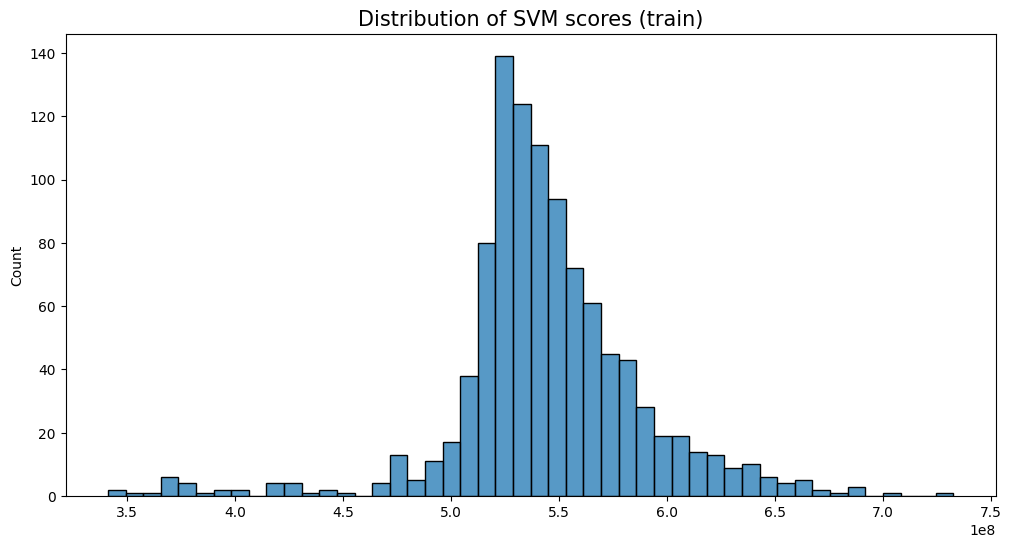

In [34]:
# visualize the distribution
plt.figure(figsize=(12, 6))
sns.histplot(scores_tr)
plt.title('Distribution of SVM scores (train)', fontsize = 15)
plt.show()

In [50]:
# set the thresholds (양측 허용오차 5%)

# case 1. percentile (하위 2.5% 허용오차)
thres1 = np.percentile(scores_tr, 2.5)

# case 2. percentile (상위 2.5% 허용오차)
thres2 = np.percentile(scores_tr, 97.5)

print("threshold (max): ", thres1, "threshold (percentile):", thres2)

threshold (max):  430260041.1063623 threshold (percentile): 639270370.6046969


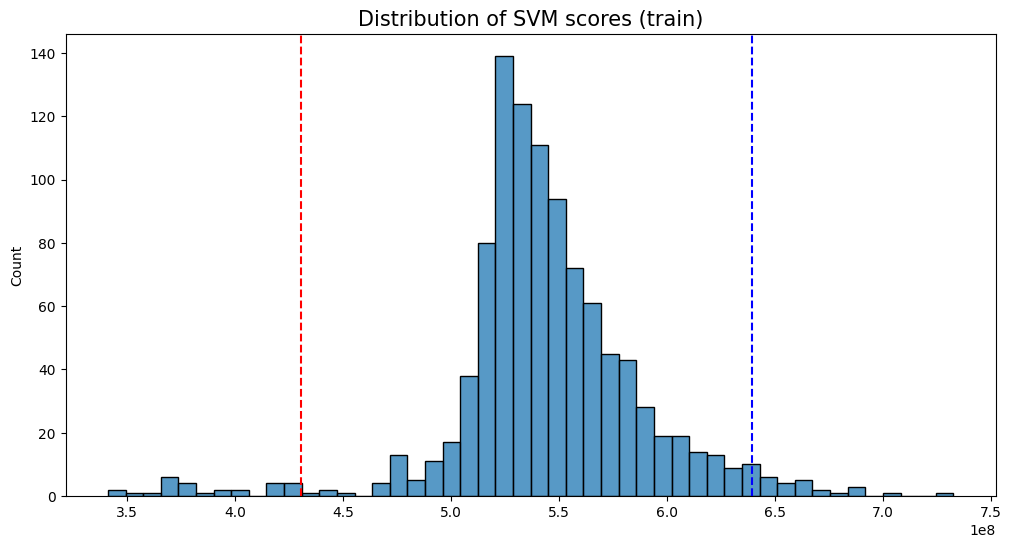

In [51]:
# visualize the distribution
plt.figure(figsize=(12, 6))
sns.histplot(scores_tr)
plt.axvline(thres1, color = "r", linestyle = "--")
plt.axvline(thres2, color = "b", linestyle = "--")
plt.title('Distribution of SVM scores (train)', fontsize = 15)
plt.show()

In [52]:
# predict lof scores
scores_ts = clf_svm.score_samples(x_test)

In [53]:
# make the results to the dataframe
results = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), pd.DataFrame(scores_ts)[0]], axis=1)
results.columns = ['Label', 'SVM Scores']

results['Pred_thres'] = 1
results.loc[(results['SVM Scores'] < thres1)|(results['SVM Scores'] > thres2), 'Pred_thres'] = -1

results

,Label,SVM Scores,Pred_thres
0,1,5.001229e+08,1
1,1,5.276069e+08,1
2,1,5.435341e+08,1
3,1,6.381717e+08,1
4,1,5.501800e+08,1
...,...,...,...
466,1,3.677497e+08,-1
467,1,5.427236e+08,1
468,1,3.855052e+08,-1
469,1,6.036556e+08,1


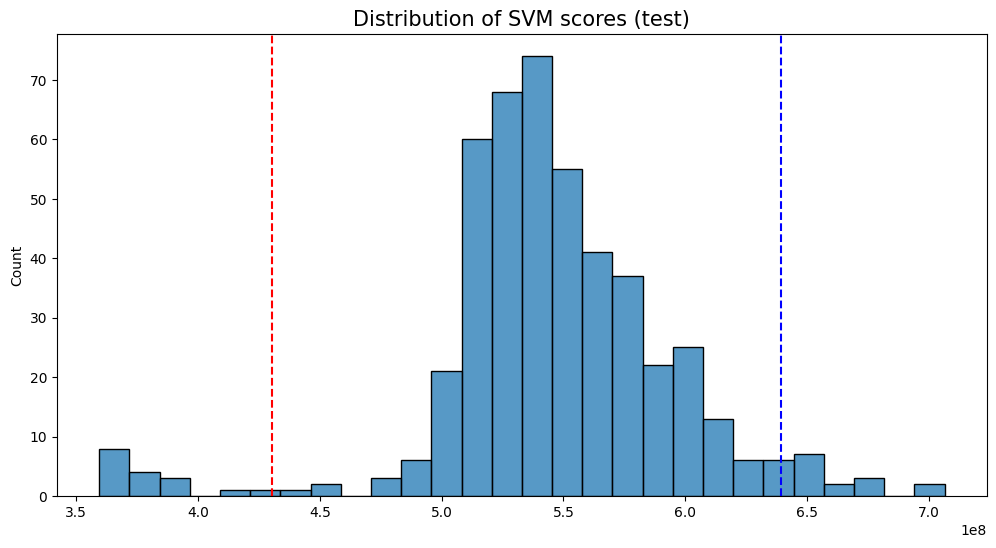

In [54]:
# visualize the distribution
plt.figure(figsize=(12, 6))
sns.histplot(scores_ts)
plt.axvline(thres1, color = "r", linestyle = "--")
plt.axvline(thres2, color = "b", linestyle = "--")
plt.title('Distribution of SVM scores (test)', fontsize = 15)
plt.show()

In [55]:
results.Label.value_counts()

Label
 1    440
-1     31
Name: count, dtype: int64

In [56]:
results.Pred_thres.value_counts()

Pred_thres
 1    439
-1     32
Name: count, dtype: int64

In [57]:
print("Classification Report (threshold) :")
print(classification_report(results.Label.values, results.Pred_thres.values))

Classification Report (threshold) :
              precision    recall  f1-score   support

          -1       0.03      0.03      0.03        31
           1       0.93      0.93      0.93       440

    accuracy                           0.87       471
   macro avg       0.48      0.48      0.48       471
weighted avg       0.87      0.87      0.87       471



- SVDD algorithm

In [68]:
from cvxopt import matrix, solvers

class SVDD:
  def __init__(self, C=1, s=0.1):
    self.C = C
    self.s = s
    self.alpha = None
    self.R2 = None
    self.Q = None
    self.X = None

  def rbf_kernel(self, x, y, s):
    return np.exp(-np.sum(np.square(x-y))/(s**2))

  def make_kernel_matrix(self, X, s):
    n = X.shape[0]
    Q = np.zeros((n, n))
    q_list = []
    for i in range(n):
      for j in range(i, n):
        q_list.append(self.rbf_kernel(X[i, ], X[j, ], s))

    Q_idx = np.triu_indices(len(Q))
    Q[Q_idx] = q_list
    Q = Q.T + Q - np.diag(np.diag(Q))
    return Q

  def fit(self, X):
    C = self.C
    s = self.s
    Q = self.make_kernel_matrix(X, s)
    n = X.shape[0]
    P = matrix(2*Q)
    q = np.array([self.rbf_kernel(x, x, s) for x in X])
    q = matrix(q.reshape(-1, 1))
    G = matrix(np.vstack([-np.eye(n), np.eye(n)]))
    h = matrix(np.hstack([np.zeros(n), np.ones(n)*C]))
    A = matrix(np.ones((1, n)))
    b = matrix(np.ones(1))

    solvers.options['show_progress'] = False
    sol = solvers.qp(P, q, G, h, A, b)
    alphas = np.array(sol['x'])

    rho = 0
    alphas = alphas.flatten()
    S = ((alphas>1e-3) & (alphas<C))
    S_idx = np.where(S)[0]

    R2 = alphas.dot(Q.dot(alphas))

    for si in S_idx:
      temp_vector = np.array([-2*alphas[i]*self.rbf_kernel(X[i,], X[si,], s) for i in range(n)])
      R2 += (self.rbf_kernel(X[si,], X[si,], s) + np.sum(temp_vector))/len(S_idx)

    self.R2 = R2
    self.alphas = alphas
    self.X = X
    self.Q = Q
    return self

  def predict(self, X):
    return np.array([np.sign(self._predict(x)) for x in X])

  def _predict(self, x):
    X = self.X
    n = X.shape[0]
    alphas = self.alphas
    R2 = self.R2
    s = self.s
    Q = self.Q
    first_term = self.rbf_kernel(x, x, s)
    second_term = np.sum([2*alphas[i]*self.rbf_kernel(x, X[i,], s) for i in range(n)])
    thrid_term = alphas.dot(Q.dot(alphas))
    return R2 - first_term + second_term - thrid_term

In [69]:
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
from sklearn.datasets import make_classification

X, _ = make_classification(n_samples = 1000, n_features = 2, n_informative = 2, n_redundant = 0, n_repeated = 0, n_classes = 2, n_clusters_per_class=1,
                           weights=[0.995, 0.005], class_sep = 0.5, random_state = 0)

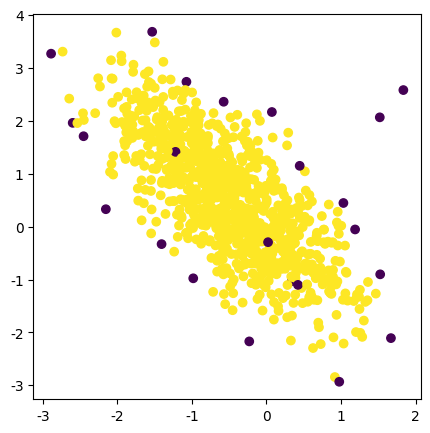

In [71]:
svdd = SVDD(C = 10, s = 1).fit(X)
labels = svdd.predict(X)

fig = plt.figure(figsize = (5, 5))
fig.set_facecolor('white')
ax = fig.add_subplot()
ax.scatter(X[:, 0], X[:, 1], c = labels)
plt.show()